<a href="https://colab.research.google.com/github/IgorEisenlohr/Data-analysis-pyspark/blob/main/Pyspark_song_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Notebook**

### Let's mount the google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=9e368cc9abc87ae4f9e864e3dfc2412b8433d4ca59f42ad4ccfcd0cfe91a44f3
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


Importing the modules 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plt

creating spark session

In [ ]:
spark = SparkSession.builder.appName("spark").getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [ ]:
listenings = spark.read.csv('/content/drive/MyDrive/dataset/listenings.csv', header=True,
                            inferSchema=True)

let's check the data:

In [ ]:
listenings.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [ ]:
listenings = listenings.drop('date')

In [ ]:
listenings.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [ ]:
print((listenings.count(), len(listenings.columns)))

(14650594, 4)


null rows?

In [ ]:
for col in listenings.columns:
  print(f'{col}: {listenings[listenings[col].isNull()].count()}')

user_id: 0
track: 230
artist: 435
album: 891137


drop the null rows:

In [ ]:
listenings = listenings.na.drop()

let's check the dataset again:

In [ ]:
for col in listenings.columns:
  print(f'{col}: {listenings[listenings[col].isNull()].count()}')

user_id: 0
track: 0
artist: 0
album: 0


let's see the schema: 

In [ ]:
listenings.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [ ]:
print((listenings.count(), len(listenings.columns)))

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listenings.select('artist','track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listenings.select('*').filter(listenings.artist == 'Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = q1.groupBy('user_id').agg(count('user_id').alias('count'))
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|         BolaJA|    3|
|    abbyquinlan|    1|
|    abiprincess|    1|
|    AndrewTerry|    2|
|      aaronspud|    1|
|       adamnmcc|    1|
|      agentgypo|    1|
|      Bauldrick|    1|
|        boardy2|    3|
|booksfromboxes_|    1|
|AshvinaShegobin|    2|
|       alexfack|    1|
|    aliceoddity|    4|
|    annie-bella|    6|
|    backstabbed|    2|
|    badboydanny|    2|
|  Bambi-strokes|    1|
|         bekari|    1|
|AbigailVictoria|    1|
| abovethewaves_|    1|
+---------------+-----+
only showing top 20 rows



In [ ]:
q2 = q2.orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [ ]:
q3 = listenings.select('artist','track').groupBy('track','artist').agg(count('track').alias('track_count')).orderBy(desc('track_count'))
q3.show()

+-------------------+--------------------+-----------+
|              track|              artist|track_count|
+-------------------+--------------------+-----------+
|              Sorry|       Justin Bieber|       3381|
|   Do I Wanna Know?|      Arctic Monkeys|       2865|
|        Skinny Love|            Bon Iver|       2836|
|         PILLOWTALK|                Zayn|       2701|
|      Mr Brightside|         The Killers|       2690|
|               Work|             Rihanna|       2646|
|            Pompeii|            Bastille|       2606|
|    Little Lion Man|      Mumford & Sons|       2520|
|           The Cave|      Mumford & Sons|       2485|
|  What Do You Mean?|       Justin Bieber|       2481|
|      Love Yourself|       Justin Bieber|       2481|
|        Starry Eyed|      Ellie Goulding|       2475|
|          Lush Life|        Zara Larsson|       2456|
|    Go Your Own Way|       Fleetwood Mac|       2448|
|        Bad Romance|           Lady Gaga|       2424|
|         

In [ ]:
q3.limit(10).show()

+----------------+--------------+-----------+
|           track|        artist|track_count|
+----------------+--------------+-----------+
|           Sorry| Justin Bieber|       3381|
|Do I Wanna Know?|Arctic Monkeys|       2865|
|     Skinny Love|      Bon Iver|       2836|
|      PILLOWTALK|          Zayn|       2701|
|   Mr Brightside|   The Killers|       2690|
|            Work|       Rihanna|       2646|
|         Pompeii|      Bastille|       2606|
| Little Lion Man|Mumford & Sons|       2520|
|        The Cave|Mumford & Sons|       2485|
|   Love Yourself| Justin Bieber|       2481|
+----------------+--------------+-----------+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [ ]:
q4 = listenings.select('artist','track').filter(listenings.artist == 'Rihanna').groupBy('track').agg(count('track').alias('count_track')).orderBy(desc('count_track')).limit(10)
q4.show()

+--------------------+-----------+
|               track|count_track|
+--------------------+-----------+
|                Work|       2646|
|Only Girl (In the...|       1749|
|We Found Love (fe...|       1575|
|                 S&M|       1307|
|            Rude Boy|       1303|
|            Diamonds|       1224|
|      Kiss it Better|        945|
| Where Have You Been|        844|
|Cheers (Drink to ...|        697|
|           Desperado|        679|
+--------------------+-----------+



**Query #5:**

find top 10 famous albums 

In [ ]:
q5 = listenings.select('album','artist').groupBy('album','artist').agg(count('*').alias('count_album')).orderBy(desc('count_album')).limit(10)
q5.show()

+--------------------+--------------------+-----------+
|               album|              artist|count_album|
+--------------------+--------------------+-----------+
|   The Life Of Pablo|          Kanye West|      22310|
|                  xx|              The xx|      14195|
|                  AM|      Arctic Monkeys|      14090|
|     An Awesome Wave|               alt-J|      13635|
|        Sigh No More|      Mumford & Sons|      13543|
|Whatever People S...|      Arctic Monkeys|      12731|
|            For Emma|            Bon Iver|      11994|
|          Art Angels|              Grimes|      11655|
|               Lungs|Florence + the Ma...|      11362|
|                  21|               Adele|      11215|
+--------------------+--------------------+-----------+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
genres = spark.read.csv('/content/drive/MyDrive/dataset/genre.csv',
                       header=True, inferSchema=True)

let's check the data

In [ ]:
genres.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [ ]:
df = listenings.join(genres, how='inner', on=['artist'])
df.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6 = df.select('*').filter(df.genre == 'pop').groupBy('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
q7 = df.select('*').groupBy('genre').agg(count('genre').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
q8_1 = df.select('user_id','genre').groupBy('user_id','genre').agg(count('*').alias('count_genre')).orderBy('user_id')
q8_1.show()

+-------+--------------------+-----------+
|user_id|               genre|count_genre|
+-------+--------------------+-----------+
| --Seph|               Bjorn|          8|
| --Seph| brazilian pop music|          1|
| --Seph| Snoop Dogg & Dev...|          4|
| --Seph|        instrumental|          1|
| --Seph|   Vladimir Spivakov|          1|
| --Seph|               samba|          2|
| --Seph|             ambient|          6|
| --Seph| Sara Mingardo & ...|          1|
| --Seph|             baroque|          1|
| --Seph|     Hilko Schomerus|          1|
| --Seph|      Kendrick Lamar|          4|
| --Seph|             hip hop|          7|
| --Seph|          electronic|          6|
| --Seph|                rock|         27|
| --Seph| London Symphony ...|          1|
| --Seph|                fado|          1|
| --Seph|          soundtrack|          1|
| --Seph|              techno|          3|
| --Seph|          french pop|          1|
| --Seph|      Alice Sara Ott|          2|
+-------+--

In [ ]:
q8 = q8_1.groupBy('user_id').agg(max(struct(col('count_genre'), col('genre'))).alias('max')).select(col('user_id'),col('max.genre'))
q8.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [ ]:
q9_genres = df.select('genre').filter( (col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='metal') | (col('genre')=='hip hop'))
q9 = q9_genres.groupBy('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-------+
|  genre|  count|
+-------+-------+
|    pop|1544747|
|hip hop| 532984|
|  metal| 208107|
|   rock|2691934|
+-------+-------+



Now, let's visualize the results using ***matplotlib***

In [ ]:
q9_list = q9.collect()
q9_list

[Row(genre='pop', count=1544747),
 Row(genre='hip hop', count=532984),
 Row(genre='metal', count=208107),
 Row(genre='rock', count=2691934)]

In [ ]:
labels = [row['genre'] for row in q9_list]
values = [row['count'] for row in q9_list]

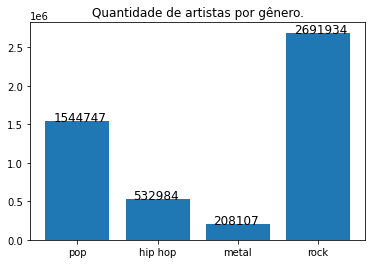

In [ ]:
plt.title('Quantidade de artistas por gênero.')
ax = plt.bar(x=labels, height=values)
for p in ax.patches:
  plt.annotate(p.get_height(), xy=(p.get_x()+0.1, p.get_height()), fontsize=12)


now lets visualize these two lists using a bar chart